In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
filepath = '/content/drive/My Drive/Colab Notebooks/Regression Project/Flight Price Prediction'

Mounted at /content/drive


In [ ]:
train = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Regression Project/Flight Price Prediction/Data_Train.xlsx')
test = pd.read_excel('/content/drive/My Drive/Colab Notebooks/Regression Project/Flight Price Prediction/Test_set.xlsx')

## Data Description

We are provided with prices of flight tickets for various airlines between the months of March and June of 2019 and between various cities.
**Size of training set:** 10683 records <br>
**Size of test set:** 2671 records <br>
FEATURES: <br>
Airline: The name of the airline. <br>
Date_of_Journey: The date of the journey <br>
Source: The source from which the service begins. <br>
Destination: The destination where the service ends. <br>
Route: The route taken by the flight to reach the destination. <br>
Dep_Time: The time when the journey starts from the source. <br>
Arrival_Time: Time of arrival at the destination. <br>
Duration: Total duration of the flight. <br>
Total_Stops: Total stops between the source and destination <br>
Additional_Info: Additional information about the flight <br>
Price: The price of the ticket

In [ ]:
test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [ ]:
train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [ ]:
train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

## Data Cleaning and EDA

In [ ]:
cols = ['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops', 'Additional_Info', 'Price']

In [ ]:
train.nunique()

Airline              12
Date_of_Journey      44
Source                5
Destination           6
Route               128
Dep_Time            222
Arrival_Time       1343
Duration            368
Total_Stops           5
Additional_Info      10
Price              1870
dtype: int64

### Date Column

In [ ]:
train['Date_of_Journey'] = train['Date_of_Journey'].str.split('/')
train['Date'] = train['Date_of_Journey'].str[0]
train['Month'] = train['Date_of_Journey'].str[1]
train['Year'] = train['Date_of_Journey'].str[2]

### Source and Destination

In [ ]:
train['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [ ]:
train['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

Departure Time and Arrival Time

I am going to split the departure time into categories such as early morning, afternoon and evening to see if I can find any inference from it.

In [ ]:
#print(train['Dep_Time'].value_counts().head(20))

In [ ]:
train['Dep_Time'] = pd.to_datetime(train['Dep_Time'])

# Extract the numerical values from time objects
train['Dep_Time_Nu'] = train['Dep_Time'].dt.hour * 60 + train['Dep_Time'].dt.minute

# Define time ranges for each category
midnight_start = 0
midnight_end = 359
morning_start = 360
morning_end = 719
afternoon_start = 720
afternoon_end = 1079
evening_start = 1080
evening_end = 1439


train['Dep_Period'] = pd.cut(
    train['Dep_Time_Nu'],
    bins=[midnight_start, morning_start, afternoon_start, evening_start, evening_end],
    labels=['Midnight', 'Morning', 'Afternoon', 'Evening'],
    right=False
)



In [ ]:
train['Arrival_Time'] = pd.to_datetime(train['Arrival_Time'])

# Extract the numerical values from time objects
train['Arrival_Time_Nu'] = train['Arrival_Time'].dt.hour * 60 + train['Arrival_Time'].dt.minute

# Define time ranges for each category
midnight_start = 0
midnight_end = 359
morning_start = 360
morning_end = 719
afternoon_start = 720
afternoon_end = 1079
evening_start = 1080
evening_end = 1439


train['Arrival_Period'] = pd.cut(
    train['Arrival_Time_Nu'],
    bins=[midnight_start, morning_start, afternoon_start, evening_start, evening_end],
    labels=['Midnight', 'Morning', 'Afternoon', 'Evening'],
    right=False
)



In [ ]:
train.dtypes

Airline                    object
Date_of_Journey            object
Source                     object
Destination                object
Route                      object
Dep_Time           datetime64[ns]
Arrival_Time       datetime64[ns]
Duration                   object
Total_Stops                object
Additional_Info            object
Price                       int64
Date                       object
Month                      object
Year                       object
Dep_Time_Nu                 int64
Dep_Period               category
Arrival_Time_Nu             int64
Arrival_Period           category
dtype: object

### Duration

In [ ]:
train['Duration'] = train['Duration'].astype(str)
train['Duration'] = train['Duration'].str.replace('h', '')
train['Duration'] = train['Duration'].str.replace('m', '')

# Split the 'Duration' values into hours and minutes
duration_split = train['Duration'].str.split(' ', expand=True)
hours = duration_split[0].astype(float)
minutes = duration_split[1].astype(float).fillna(0)

# Convert the 'Duration' values to minutes
train['Duration'] = hours * 60 + minutes

### Total Stops

In [ ]:
train['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [ ]:
train['Total_Stops'].replace('non-stop','0',inplace=True)
train['Total_Stops'] = train['Total_Stops'].str.split(' ')
train['Total_Stops'] = train['Total_Stops'].str[0]

### Additional Info

In [ ]:
train['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [ ]:
train['Additional_Info'].replace('No Info', 'No info', inplace=True)

In [ ]:
train.isna().sum()

Airline            0
Source             0
Destination        0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
Date               0
Month              0
Year               0
Dep_Period         0
Arrival_Period     0
dtype: int64

In [ ]:
train.fillna(0, inplace=True)

### Removing unwanted columns

In [ ]:
train = train.drop(['Date_of_Journey', 'Route', 'Dep_Time', 'Arrival_Time', 'Dep_Time_Nu', 'Arrival_Time_Nu'], axis=1)

In [ ]:
train

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Period,Arrival_Period
0,IndiGo,Banglore,New Delhi,170.0,0,No info,3897,24,03,2019,Evening,Midnight
1,Air India,Kolkata,Banglore,445.0,2,No info,7662,1,05,2019,Midnight,Afternoon
2,Jet Airways,Delhi,Cochin,1140.0,2,No info,13882,9,06,2019,Morning,Midnight
3,IndiGo,Kolkata,Banglore,325.0,1,No info,6218,12,05,2019,Evening,Evening
4,IndiGo,Banglore,New Delhi,285.0,1,No info,13302,01,03,2019,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150.0,0,No info,4107,9,04,2019,Evening,Evening
10679,Air India,Kolkata,Banglore,155.0,0,No info,4145,27,04,2019,Evening,Evening
10680,Jet Airways,Banglore,Delhi,180.0,0,No info,7229,27,04,2019,Morning,Morning
10681,Vistara,Banglore,New Delhi,160.0,0,No info,12648,01,03,2019,Morning,Afternoon


In [ ]:
train.dtypes

Airline              object
Source               object
Destination          object
Duration            float64
Total_Stops          object
Additional_Info      object
Price                 int64
Date                 object
Month                object
Year                 object
Dep_Period         category
Arrival_Period     category
dtype: object

In [ ]:
train['Total_Stops'] = train['Total_Stops'].astype('int64')
#train['Date'] = train['Date'].astype('int64')
#train['Month'] = train['Month'].astype('int64')
#train['Year'] = train['Total_Stops'].astype('int64')

In [ ]:
cols = ['Airline', 'Source', 'Destination', 'Total_Stops', 'Additional_Info', 'Dep_Period', 'Arrival_Period', 'Month']
#num = ['Month', 'Year', 'Dep_Time_Hour', 'Arrival_Date', 'Arrival_hr', 'Duration_hrs'] # excluding total stops and date

In [ ]:
#sns.pairplot(train)

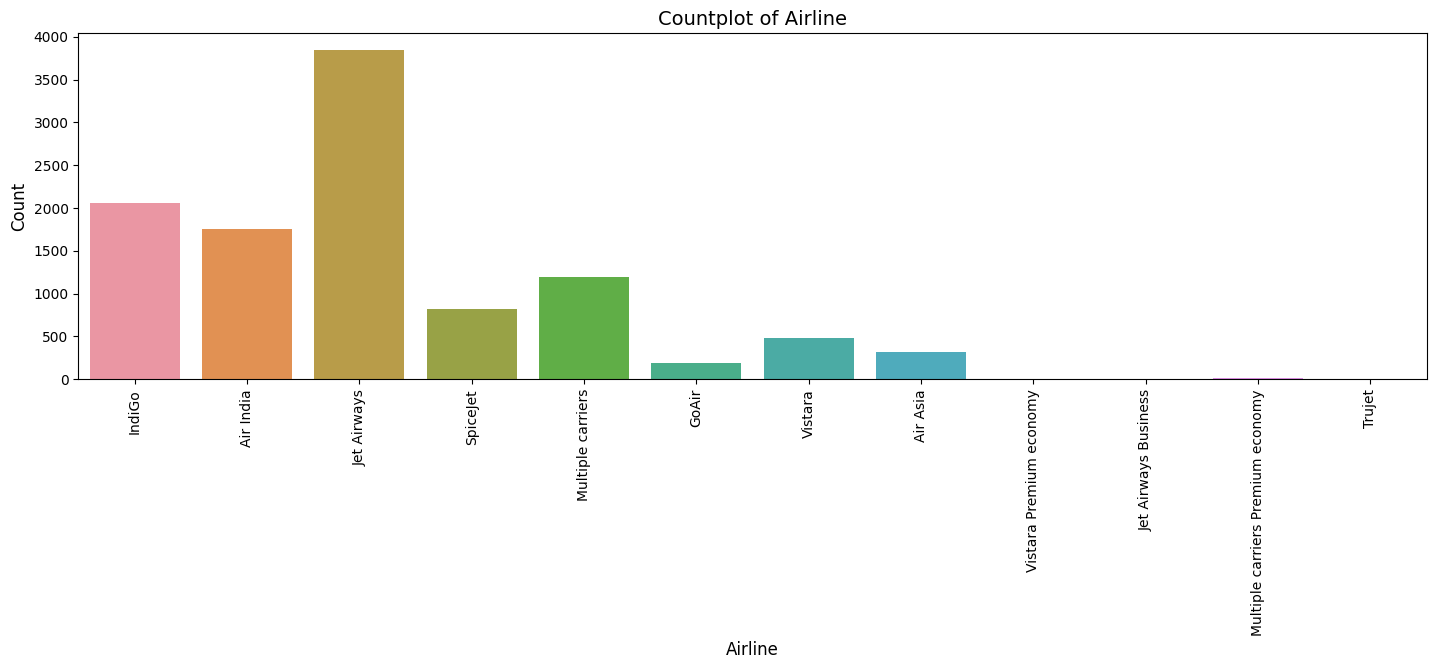

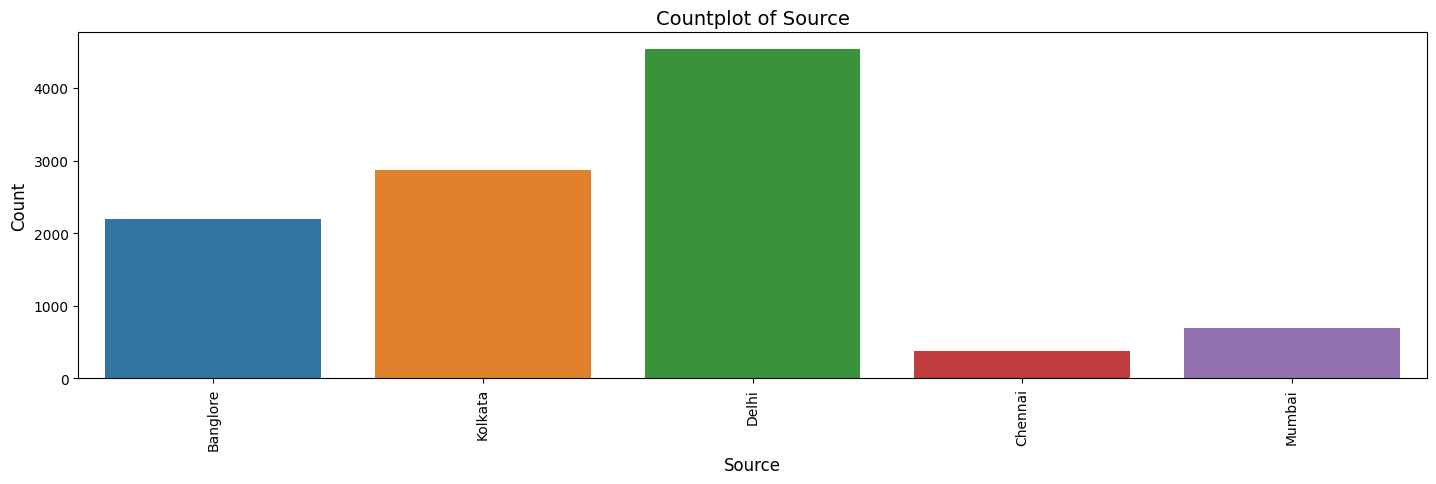

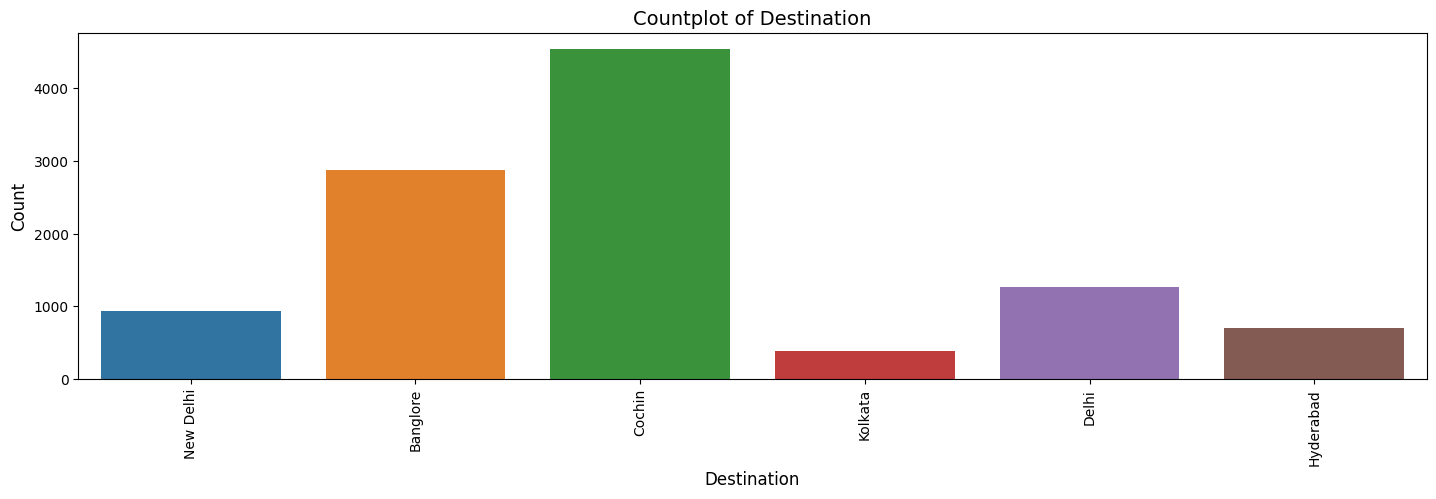

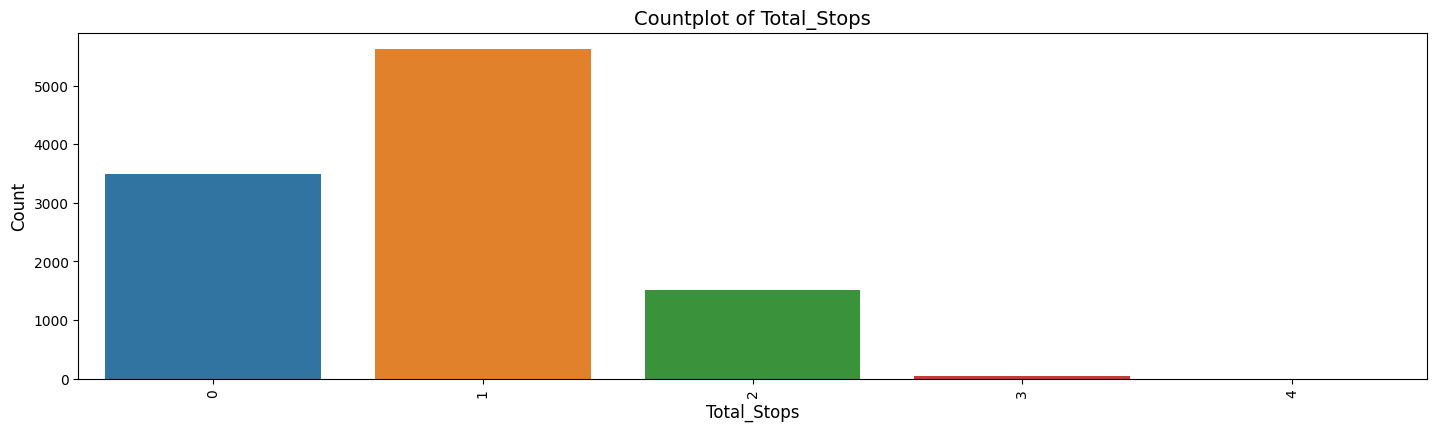

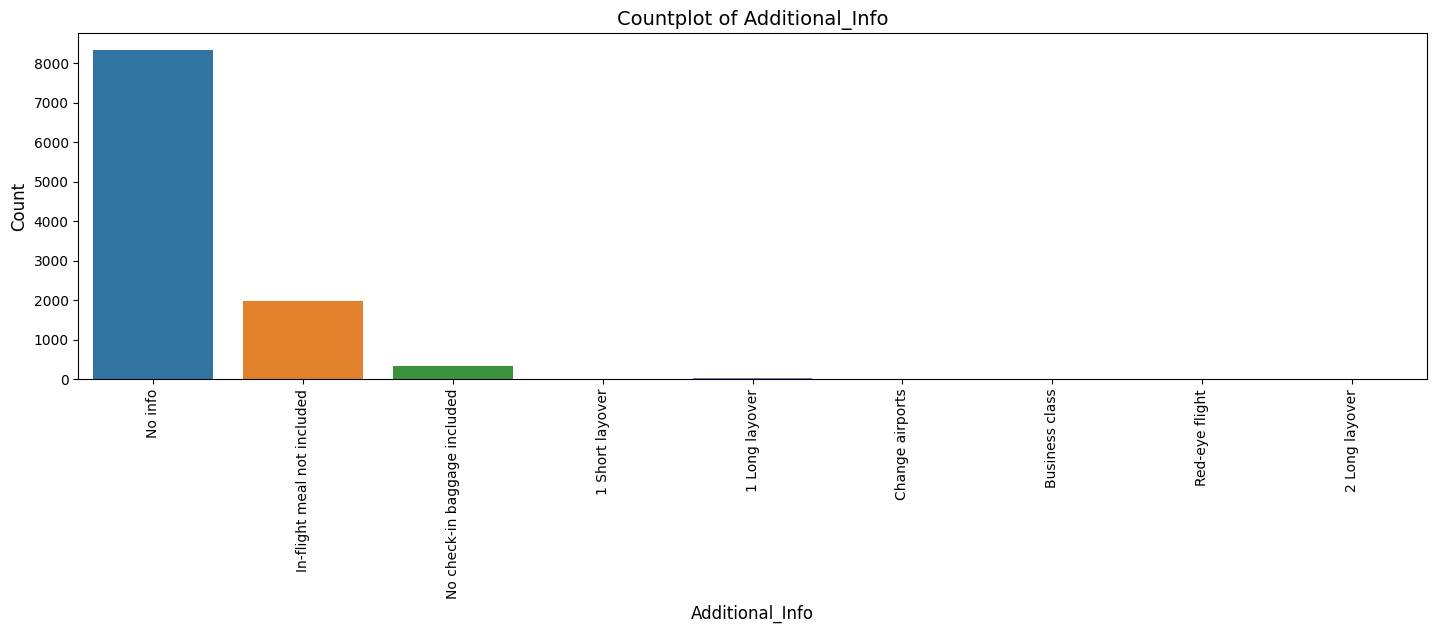

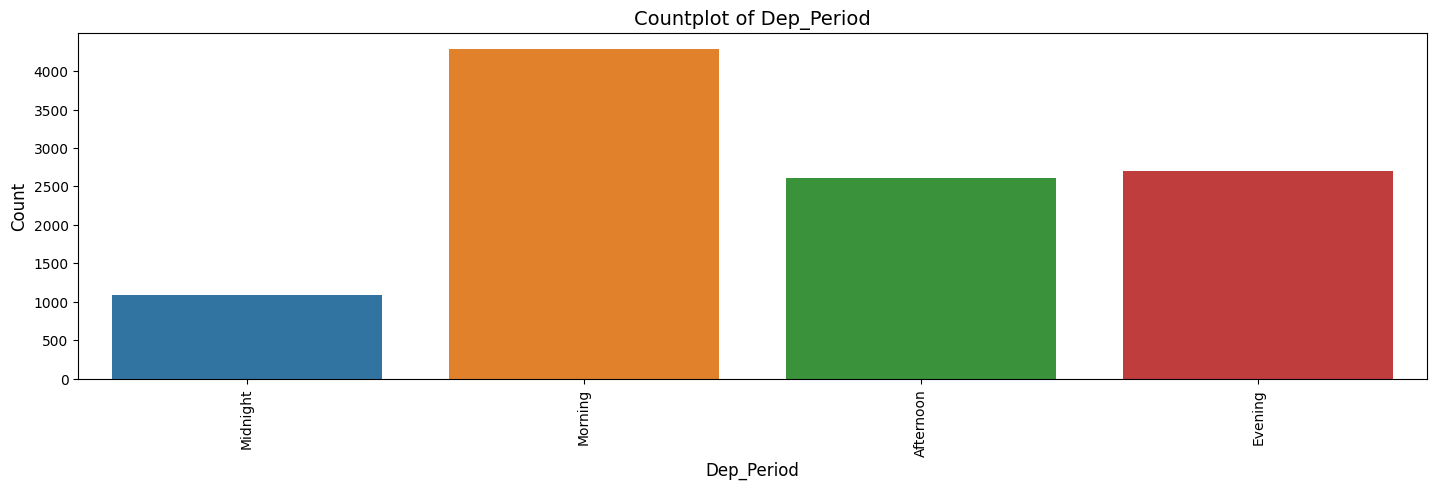

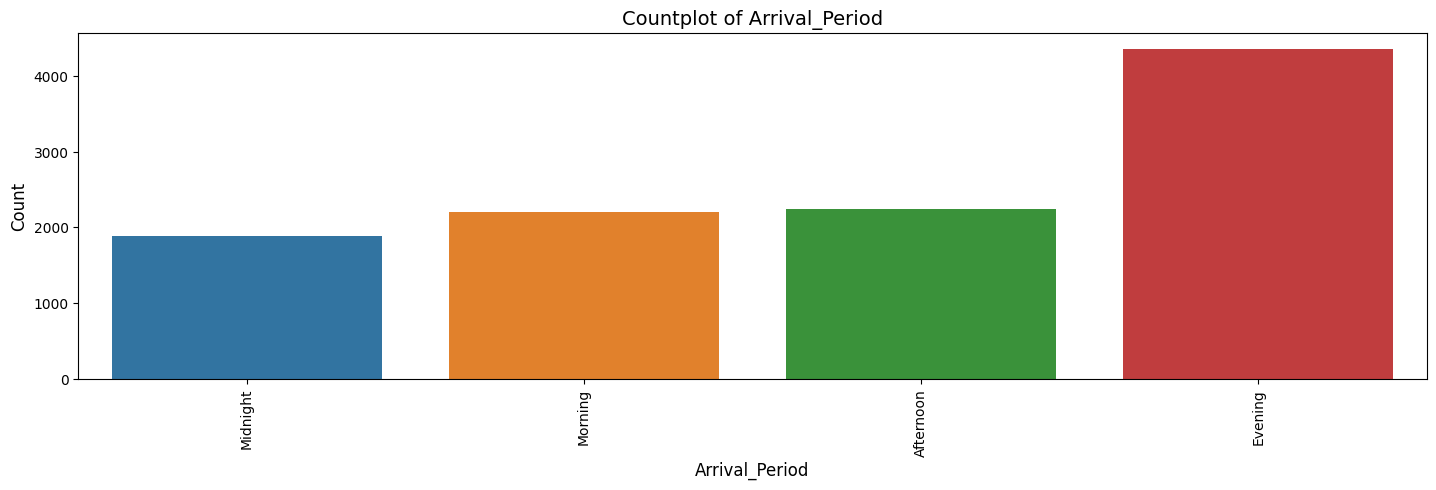

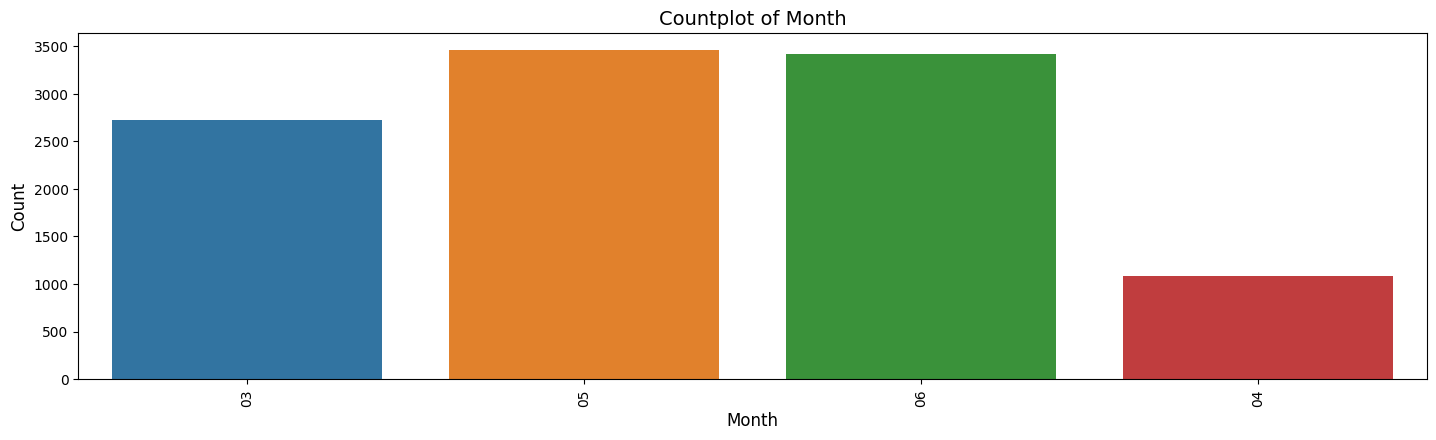

In [ ]:
for column in cols:
    plt.figure(figsize=(15, 5))
    sns.countplot(x=column, data=train)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.title(f'Countplot of {column}', fontsize=14)
    plt.tight_layout(pad = 3.0)
    plt.xticks(rotation = 90)
    plt.show()

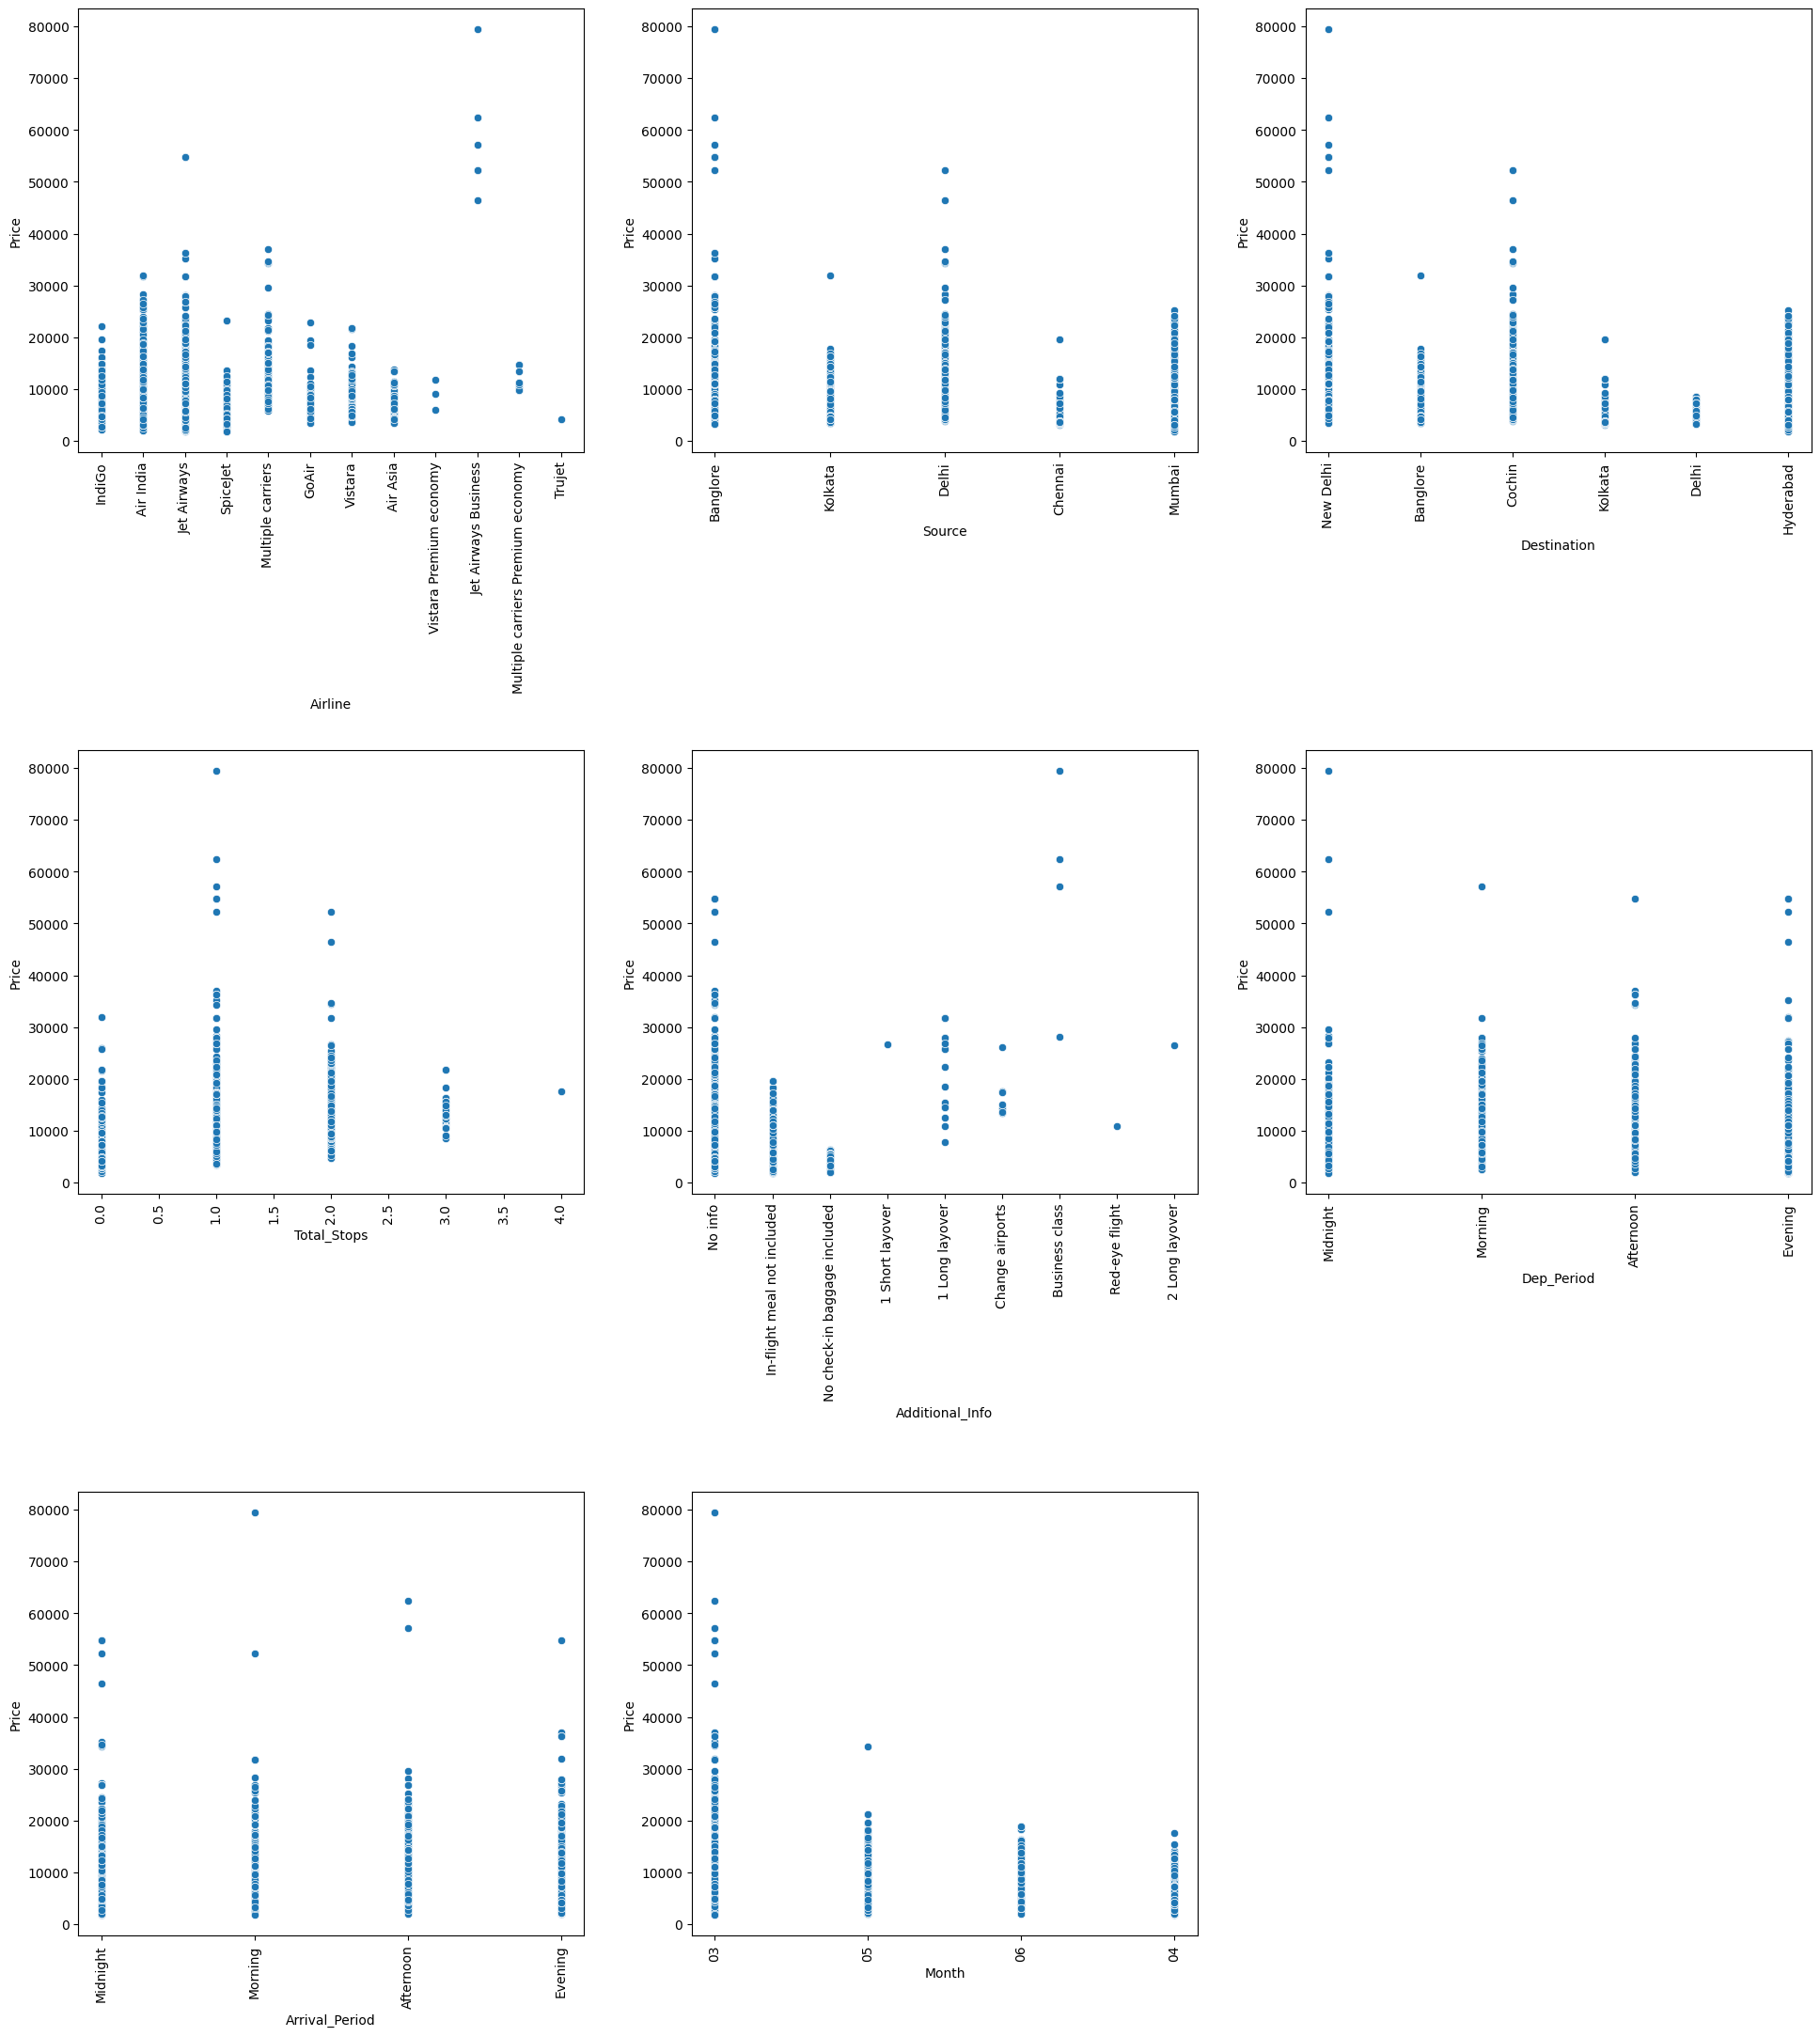

In [ ]:
# Checking the relationship of Prices with different features
c=1
plt.figure(figsize=(20,45))

for i in cols:
  plt.subplot(6,3,c)
  sns.scatterplot(x=train[i], y=train.Price)
  plt.xticks(rotation=90)
  plt.tight_layout(pad=3.0)
  c=c+1
plt.show()

In [ ]:
train

,Airline,Source,Destination,Duration,Total_Stops,Additional_Info,Price,Date,Month,Year,Dep_Period,Arrival_Period
0,IndiGo,Banglore,New Delhi,170.0,0,No info,3897,24,03,2019,Evening,Midnight
1,Air India,Kolkata,Banglore,445.0,2,No info,7662,1,05,2019,Midnight,Afternoon
2,Jet Airways,Delhi,Cochin,1140.0,2,No info,13882,9,06,2019,Morning,Midnight
3,IndiGo,Kolkata,Banglore,325.0,1,No info,6218,12,05,2019,Evening,Evening
4,IndiGo,Banglore,New Delhi,285.0,1,No info,13302,01,03,2019,Afternoon,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,150.0,0,No info,4107,9,04,2019,Evening,Evening
10679,Air India,Kolkata,Banglore,155.0,0,No info,4145,27,04,2019,Evening,Evening
10680,Jet Airways,Banglore,Delhi,180.0,0,No info,7229,27,04,2019,Morning,Morning
10681,Vistara,Banglore,New Delhi,160.0,0,No info,12648,01,03,2019,Morning,Afternoon


## Outlier Detection and Skewness

<Axes: xlabel='Duration'>

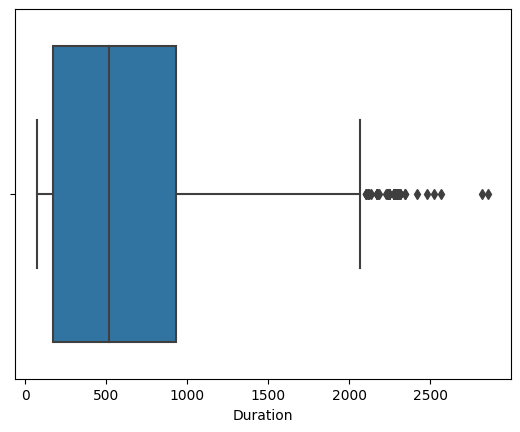

In [ ]:
sns.boxplot(x='Duration', data=train)

<Axes: xlabel='Total_Stops'>

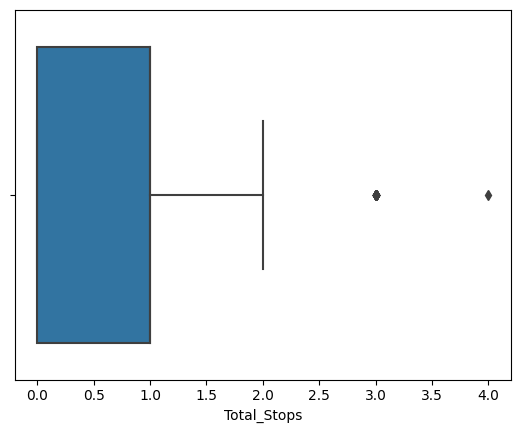

In [ ]:
sns.boxplot(x='Total_Stops', data=train)

In [ ]:
cols = ['Duration', 'Total_Stops']
for column in cols:
    IQR = train[column].quantile(0.75) - train[column].quantile(0.25)
    Lower_fence = train[column].quantile(0.25) - (IQR * 3)
    Upper_fence = train[column].quantile(0.75) + (IQR * 3)
    print(f'{column} outliers are values < {round(Lower_fence,2)} or > {round(Upper_fence,2)}')

Duration outliers are values < -2110.0 or > 3210.0
Total_Stops outliers are values < -3.0 or > 4.0


In [ ]:
# For Duration
# replacing any value lesser than -2.4 with -2.4
# train['Duration'] = np.where(train['Duration'] < -2110.0, -2110.0, train['Duraion'])
# replacing any value greater than 3.2 with 3.2
# train['Duration'] = np.where(train['Duration'] > 3210, 3210, train['Duration'])

In [ ]:
train.skew()

<ipython-input-68-1d3a3c99b9d6>:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  train.skew()


Duration       0.861203
Total_Stops    0.317230
Price          1.812552
Date           0.118351
Month         -0.387493
Year           0.000000
dtype: float64

In [ ]:
train.dtypes

Airline              object
Source               object
Destination          object
Duration            float64
Total_Stops           int64
Additional_Info      object
Price                 int64
Date                 object
Month                object
Year                 object
Dep_Period         category
Arrival_Period     category
dtype: object

## Encoding Categorical Columns


In [ ]:
cat = train[['Airline', 'Source', 'Destination', 'Additional_Info', 'Dep_Period', 'Arrival_Period']]
cat_dummy= pd.get_dummies(cat, drop_first=True)

In [ ]:
cat.head()
# All the categories have nominal data

,Airline,Source,Destination,Additional_Info,Dep_Period,Arrival_Period
0,IndiGo,Banglore,New Delhi,No info,Evening,Midnight
1,Air India,Kolkata,Banglore,No info,Midnight,Afternoon
2,Jet Airways,Delhi,Cochin,No info,Morning,Midnight
3,IndiGo,Kolkata,Banglore,No info,Evening,Evening
4,IndiGo,Banglore,New Delhi,No info,Afternoon,Evening


In [ ]:
pip install category_encoders

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 2.8 MB/s eta 0:00:00


In [ ]:
import category_encoders as ce

encoder = ce.OneHotEncoder(cols= cat, handle_unknown='return_nan', return_df=True, use_cat_names=True)

In [ ]:
train = encoder.fit_transform(train)
print(train)

       Airline_IndiGo  Airline_Air India  Airline_Jet Airways  \
0                 1.0                0.0                  0.0   
1                 0.0                1.0                  0.0   
2                 0.0                0.0                  1.0   
3                 1.0                0.0                  0.0   
4                 1.0                0.0                  0.0   
...               ...                ...                  ...   
10678             0.0                0.0                  0.0   
10679             0.0                1.0                  0.0   
10680             0.0                0.0                  1.0   
10681             0.0                0.0                  0.0   
10682             0.0                1.0                  0.0   

       Airline_SpiceJet  Airline_Multiple carriers  Airline_GoAir  \
0                   0.0                        0.0            0.0   
1                   0.0                        0.0            0.0   
2           

In [ ]:
cat_dummy

,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,Airline_Vistara,...,Additional_Info_In-flight meal not included,Additional_Info_No check-in baggage included,Additional_Info_No info,Additional_Info_Red-eye flight,Dep_Period_Morning,Dep_Period_Afternoon,Dep_Period_Evening,Arrival_Period_Morning,Arrival_Period_Afternoon,Arrival_Period_Evening
0,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
4,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
10679,1,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,1
10680,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,1,0,0,1,0,0
10681,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


## Feature Selection

In [ ]:
from sklearn.feature_selection import RFECV

rfecv = RFECV(estimator = model, step = 1, cv = 5, scoring = 'r2')
rfecv = rfecv.fit(X_train, y_train)

print("The optimal number of features:", rfecv.n_features_)
print("Best features:", X_train.columns[rfecv.support_])

In [ ]:
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

model = LinearRegression()
model.fit(X_train_selected, y_train)
y_pred_test = model.predict(X_test_selected)
result_test = 1 - np.sqrt(np.square(np.log10(y_pred_test +1) - np.log10(y_test +1)).mean())
print("Test Result:", result_test)

In [ ]:
# Import VarianceThreshold from Scikit-learn
from sklearn.feature_selection import VarianceThreshold

# Create VarianceThreshold object to perform variance thresholding
selector = VarianceThreshold()

In [ ]:
# Perform variance thresholding
selector.fit_transform(X1)

# Print the name and variance of each feature
for feature in zip(data.columns, selector.variances_):
    print(feature)

In [ ]:
X = train.drop(labels=['Price'], axis=1)
y = train['Price'].values

from sklearn.model_selection import train_test_split
X_train, X_cv, y_train, y_cv = train_test_split(X, y, test_size=0.25, random_state=1)